# Geopandas Global Terrorism Statistics

This project will explore possible links between several population and environmental factors with the prevalence of terrorist attacks. 

Initially, a basic geopandas implementation will be created to display the world map. Data from multiple datasets, available in this repository and on kaggle, will be used to plot onto the map and generate graphs to find trends in the data.

### Geopandas Setup

The following code imports the required libraries and plots a basic world map. The colours given to each country are not indicative of any information, they are simply there to make the map more visually appealing.

In [242]:
# Import the required libraries
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np

# Load the basic world map from the shape file
world = gpd.read_file("datasets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Show all the countries in the world GeoDataFrame
print(world["NAME"].value_counts())

NAME
Fiji                        1
Tanzania                    1
W. Sahara                   1
Canada                      1
United States of America    1
                           ..
Serbia                      1
Montenegro                  1
Kosovo                      1
Trinidad and Tobago         1
S. Sudan                    1
Name: count, Length: 177, dtype: int64


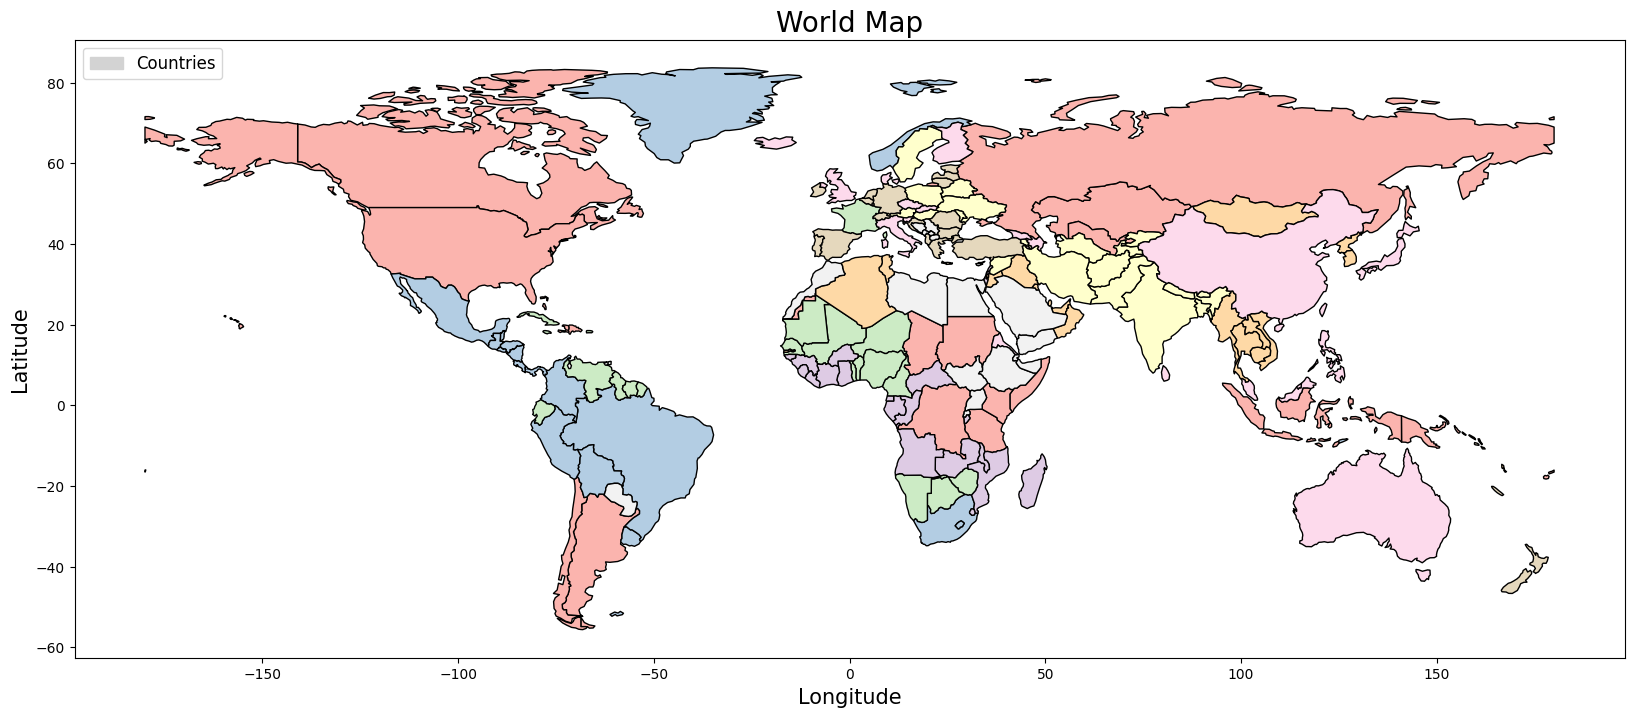

In [243]:
# Define the figure and subplot to draw to
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Drop Antarctica and Seven seas (open ocean) from the world map to avoid clutter
dropIdxs = world["CONTINENT"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])

world = world.drop(world[dropIdxs].index)

# Set the style for the plot
world.plot(
    ax=ax, 
    cmap="Pastel1", 
    edgecolor="black"
    )

# Set the title and labels
plt.title("World Map", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)

# Add a legend
legendPatches = [mpatches.Patch(color='lightgrey', label='Countries')]
ax.legend(handles=legendPatches, loc='upper left', fontsize=12)

# Show the plot
plt.show()

The following code filters the data by continent, selecting and displaying only the countries within North America.

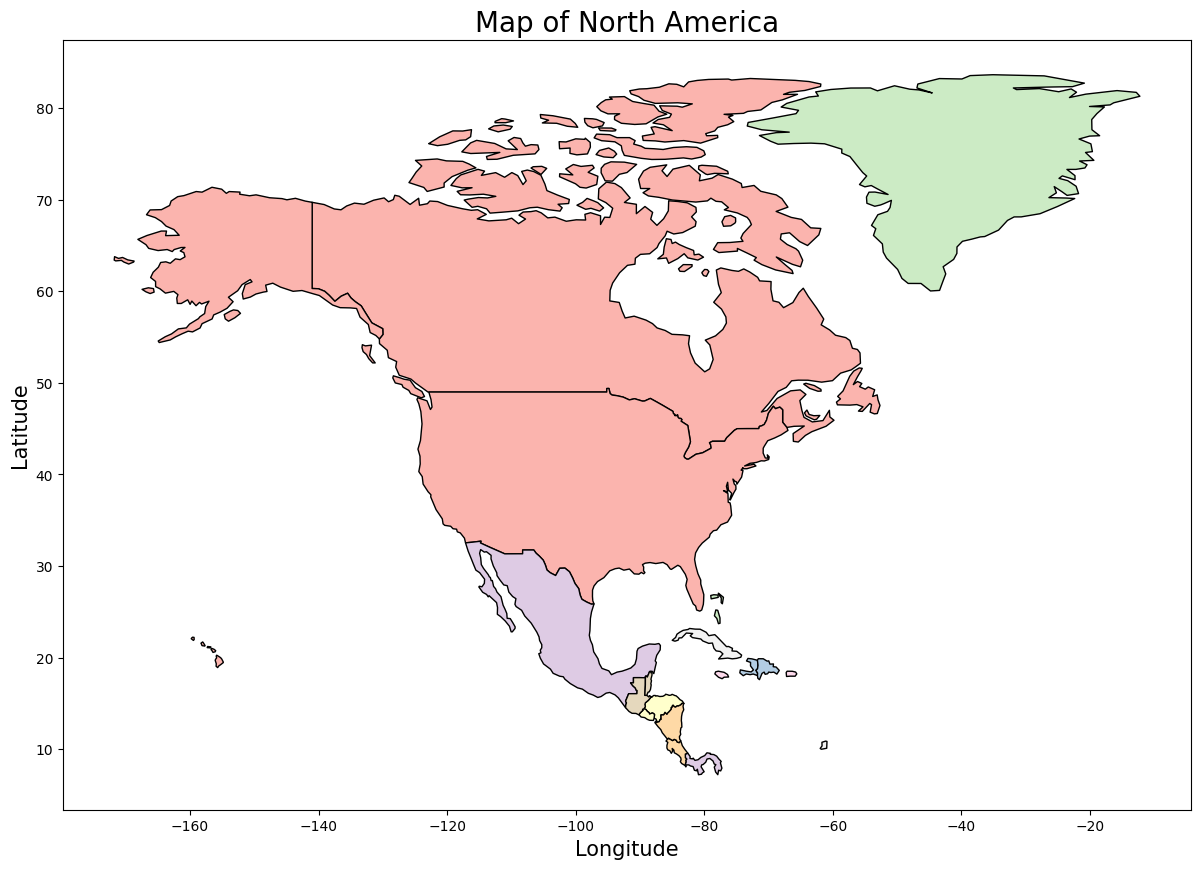

In [244]:
# Count the number of countries in each continent
world["CONTINENT"].value_counts()

# Define the figure and subplot to draw to
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Filter the world map to only include North American countries
northAmerica = world[world["CONTINENT"] == "North America"]

# Set the style for the plot
northAmerica.plot(
    ax=ax, 
    cmap="Pastel1", 
    edgecolor="black"
    )

# Set the title and labels
plt.title("Map of North America", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)

# Show the plot
plt.show()

The following code will generate a map view where all countries within a continent are similarly coloured.

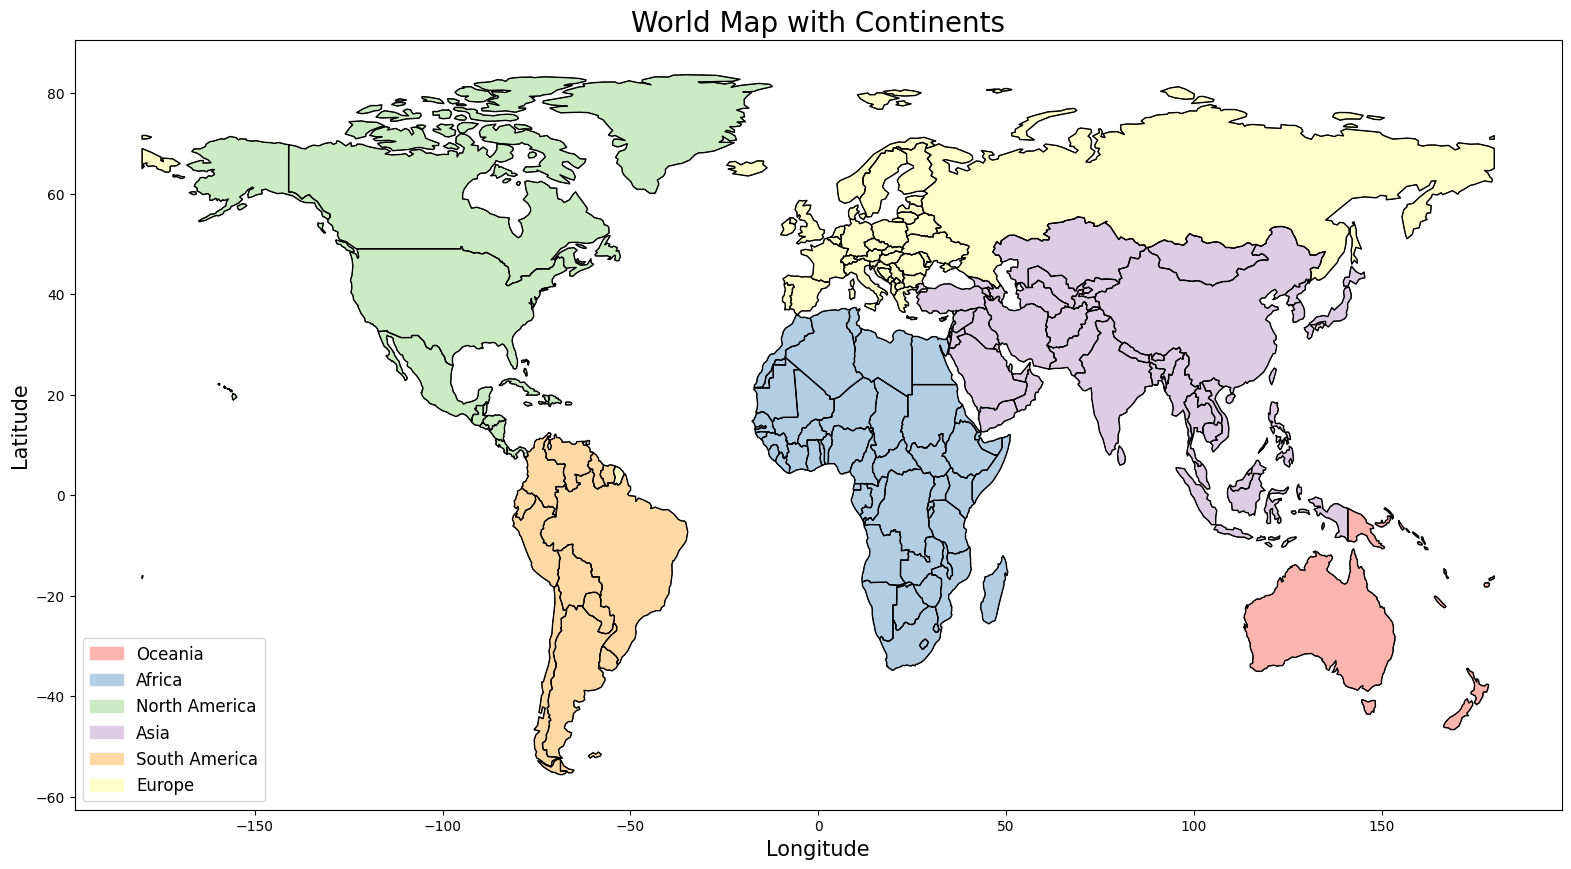

In [245]:
# Define the figure and subplot to draw to
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Plot a boundary map to add colours to the continents
world.boundary.plot(
    ax=ax,
    linewidth=0.5,
    color="black"
)

# Get the unique continents and their corresponding colours
continents = world["CONTINENT"].unique()
colours = sns.color_palette("Pastel1", n_colors=len(continents))
patches = []

# Set the patches for each continent
for (continentName, colour) in list(zip(continents, colours)):
    continent = world[world["CONTINENT"] == continentName]
    continent.plot(
        ax=ax,
        color=colour,
        edgecolor="black",
    )

    patch = mpatches.Patch(color=colour, label=continentName)
    patches.append(patch)

# Set location of the legend
ax.legend(handles=patches, loc='lower left', fontsize=12)

# Set the title and labels
plt.title("World Map with Continents", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)

# Show the plot
plt.show()

# Plotting global terrorism

The following segments of code will access a dataset containing global terrorism statistics. The data exists per country, and therefore can be used similarly to the continental colouring example to create a heat map. The code will create a map which shows the number of terrorist attacks per 1000 people within the countries population.

In [246]:
terrorDf = pd.read_csv("datasets/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

terrorDf.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_20288\1971309856.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorDf = pd.read_csv("datasets/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


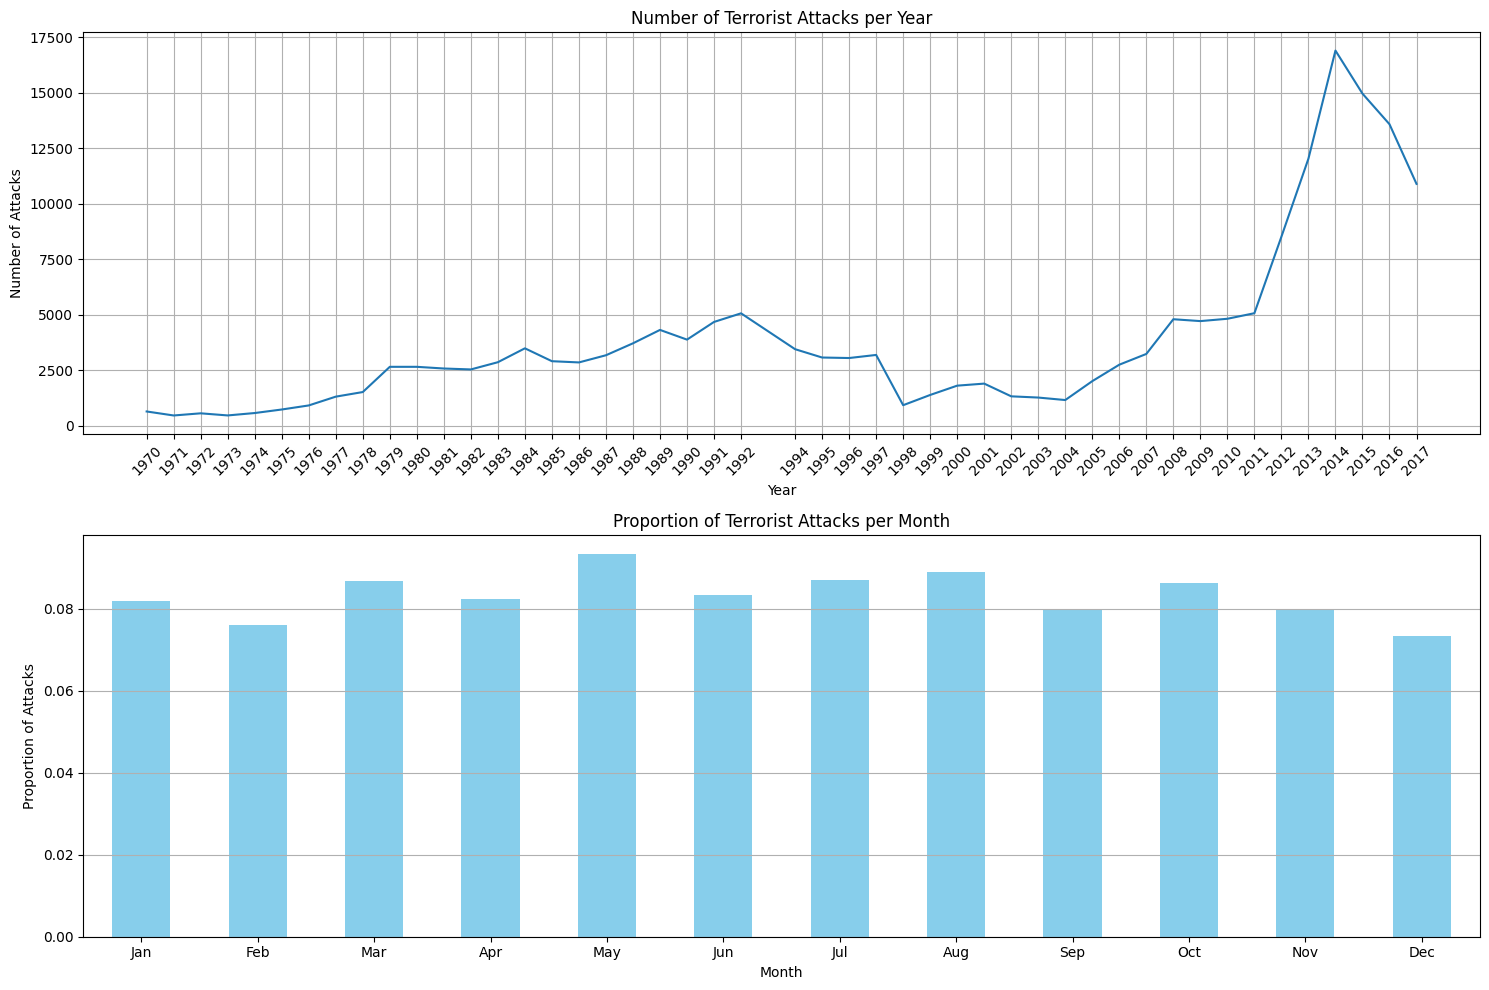

In [247]:
# Get the number of attacks per year
attacks = terrorDf["iyear"].value_counts().sort_index()

# Define overall figure
plt.figure(figsize=(15, 10))

# Create plot for attacks per year
# Create a subplot for the attacks per year
plt.subplot(2, 1, 1)
attacks.plot(
    figsize=(15, 10),
    kind="line",
)

# Set the title and labels for the plot
plt.title("Number of Terrorist Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")

# Add x label for each year
plt.xticks(attacks.index, rotation=45)  

# Show the plot
plt.grid(True)


# Create plot for average proportion of attacks per month
# Get all data for valid months (1 - 12, ignores 0)
validMonths = terrorDf[terrorDf["imonth"].between(1, 12)]

# Get counts for all months, group by year then month
monthCounts = validMonths.groupby(["iyear", "imonth"]).size()

# Create a new table with year as index, month as column
monthTable = monthCounts.unstack(fill_value=0)

# Get average per month
# Sum month counts for a year, divide each months value by total
monthProportions = monthTable.div(monthTable.sum(axis=1), axis=0)
# Average each month over all years
averageMonthProportions = monthProportions.mean().sort_index()

# Create a subplot for the attacks per month
plt.subplot(2, 1, 2)
averageMonthProportions.plot(
    kind="bar",
    color="skyblue"
)

# Set the title and labels for the plot
plt.title("Proportion of Terrorist Attacks per Month")
plt.xlabel("Month")
plt.ylabel("Proportion of Attacks")

# Give each month the correct label
plt.xticks(
    ticks=range(12),
    rotation=0,
    labels= [
        "Jan", "Feb", "Mar", 
        "Apr", "May", "Jun",
        "Jul", "Aug", "Sep",
        "Oct", "Nov", "Dec"
    ]
)

plt.grid(True, axis="y")

# Show the plot
plt.tight_layout()
plt.show()



The above plots show a clear upwards trend in the number of terrorist attacks over time globally, especially post 2011. Notably, there are drops from around 1992 to 2004, and from 2014 onwards. Furthermore, the plots show that the month has very little correlation with the number of attacks as the proportion is mostly consistent. May is higher and december is lower than the others, but not by a large amount.

In [248]:
# Findind country names that don't exist in both, or that have different names
terrorCountries = set(terrorDf["country_txt"].unique())
worldCountries = set(world["NAME"].unique())

print(sorted(worldCountries))

diff = sorted(worldCountries.symmetric_difference(terrorCountries))

print(diff)

# Map to convert invalid names from terrorDF into valid names 
# Manually checked for matching names
validNameMap ={
    "Bosnia-Herzegovina": "Bosnia and Herz.",
    "Central African Republic": "Central African Rep.",
    "Czech Republic": "Czechia",
    "Democratic Republic of the Congo": "Dem. Rep. Congo",
    "People's Republic of the Congo": "Dem. Rep. Congo",
    "Republic of the Congo": "Dem. Rep. Congo",
    "Dominican Republic": "Dominican Rep.",
    "Dominica": "Dominican Rep.",
    "East Germany (GDR)": "Germany",
    "Equatorial Guinea": "Eq. Guinea",
    "Falkland Islands": "Falkland Is.",
    "Slovak Republic": "Slovakia",
    "solomon Islands": "Solomon Is.",
    "United States": "United States of America",
    "West Germany (FRG)": "Germany",
    "West Bank and Gaza Strip": "Palestine"
}

# Replace the names in the terrorDf with valid names
terrorDf["country_txt"] = terrorDf["country_txt"].replace(validNameMap)

# Get valid countries from worlds GeoDataFrame
validCountries = set(world["NAME"].unique())

# keep only the countries that are in both the terrorDf and world GeoDataFrame
terrorDf = terrorDf[terrorDf["country_txt"].isin(validCountries)]


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon'

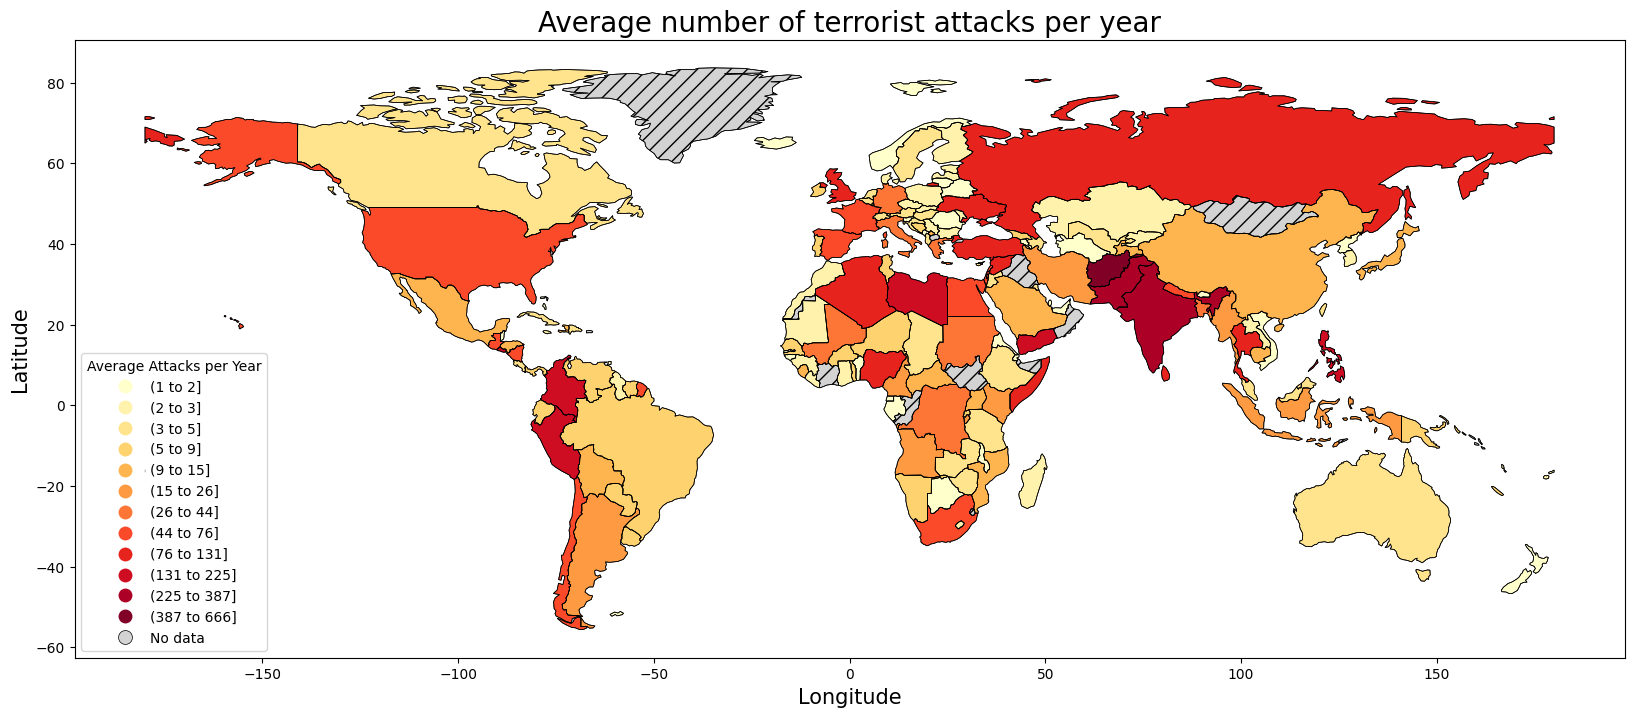

In [249]:
# Define the figure and subplot to draw to
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Plot a boundary map to add colours to the continents
world.boundary.plot(
    ax=ax,
    linewidth=0.5,
    color="black"
)

# Get Number of attacks per country and year
# Group by country and year, then count the number of attacks
attacksPerCountry = terrorDf.groupby(["country_txt", "iyear"]).size()

# Get the average number of attacks per country
averageAttacksPerCountry = attacksPerCountry.groupby("country_txt").mean()
averageAttacksPerCountry = averageAttacksPerCountry.rename("avg_attacks_per_year").reset_index()

# Merge the average attacks per country with the world GeoDataFrame
world = world.merge(averageAttacksPerCountry, left_on="NAME", right_on="country_txt", how="left")


# Create seaborn colour palette for the average attacks per country
# Use logarithmic scale for better visualisation
minValue = world["avg_attacks_per_year"][world["avg_attacks_per_year"] > 0].min()
maxValue = world["avg_attacks_per_year"].max()

bins = np.logspace(np.log10(minValue), np.log10(maxValue), 13)

# Create bins for the average attacks per year
world["attack_bin"] = pd.cut(
    world["avg_attacks_per_year"],
    bins=bins,
    include_lowest=True
)

# Plot the world map with the average attacks per year
# Use the bins to colour the countries based on the average attacks per year
world.plot(
    ax=ax,
    column="attack_bin",
    cmap="YlOrRd",
    edgecolor="black",
    legend=True,
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "black",
        "hatch": "//",
        "label": "No data"
    },
)

# Set the legend title and location
legend = ax.get_legend()
if legend is not None:
    legend.set_title("Average Attacks per Year")
    legend.set_bbox_to_anchor((0, 0))
    legend.set_loc("lower left")

    # Round the legend labels
    for text in legend.get_texts():
        label = text.get_text()

        # Labels are interval strings like "(10.5, 20.2]"
        # Extract numbers and round them
        import re

        def round_interval(label):
            # Extract numbers
            nums = re.findall(r"[-+]?\d*\.\d+|\d+", label)
            if len(nums) == 2:
                left = round(float(nums[0]))
                right = round(float(nums[1]))
                # Rebuild the label keeping interval brackets
                new_label = label[0] + str(left) + " to " + str(right) + label[-1]
                return new_label
            return label

        new_label = round_interval(label)
        text.set_text(new_label)

# Set the title and labels
plt.title("Average number of terrorist attacks per year", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)

# Show the plot
plt.show()